<a href="https://colab.research.google.com/github/buzzudit/Learning-Deep-Learning/blob/master/Breast_Cancer_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow -U

     |████████████████████████████████| 320.4MB 50kB/s 
     |████████████████████████████████| 460kB 38.6MB/s 
     |████████████████████████████████| 6.8MB 37.7MB/s 
  Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Found existing installation: tensorflow-estimator 2.0.1
    Uninstalling tensorflow-estimator-2.0.1:
      Successfully uninstalled tensorflow-estimator-2.0.1
  Found existing installation: tensorboard 2.0.2
    Uninstalling tensorboard-2.0.2:
      Successfully uninstalled tensorboard-2.0.2
  Found existing installation: tensorflow 2.0.0
    Uninstalling tensorflow-2.0.0:
      Successfully uninstalled tensorflow-2.0.0


In [28]:
import tensorflow as tf

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import   train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
dataset = load_breast_cancer()

In [31]:
type(dataset)

sklearn.utils.Bunch

In [32]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [33]:
dataset.data.shape

(569, 30)

In [34]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [35]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [36]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [40]:
x_train, x_test, y_train, y_test = train_test_split(dataset.data,dataset.target, test_size=0.33)
N,D = x_train.shape

In [44]:
scaler  = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [46]:
ACTIVATION ='sigmoid'
OPTIMIZER = 'adam'
LOSS = 'binary_crossentropy'
METRICS = ['accuracy']


In [47]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(D,)),
                                    tf.keras.layers.Dense(1, activation=ACTIVATION)
])
model.compile(optimizer = OPTIMIZER, loss = LOSS, metrics = METRICS)

In [48]:
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 13ms/step - loss: 0.5841 - accuracy: 0.6562 - val_loss: 0.5158 - val_accuracy: 0.7500
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5196 - accuracy: 0.7375 - val_loss: 0.4576 - val_accuracy: 0.8138
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4640 - accuracy: 0.8031 - val_loss: 0.4102 - val_accuracy: 0.8617
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4183 - accuracy: 0.8451 - val_loss: 0.3709 - val_accuracy: 0.8989
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3799 - accuracy: 0.8924 - val_loss: 0.3390 - val_accuracy: 0.9149
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3488 - accuracy: 0.9108 - val_loss: 0.3125 - val_accuracy: 0.9255
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3225 - accuracy: 0.9318 - val_loss: 0.2903 - val_accuracy: 0.9309
Epoch 8/100


In [49]:
print(f"Train score: {model.evaluate(x_train,y_train)}")
print(f"Test score {model.evaluate(x_test,y_test)}")

12/12 [==============================] - 0s 1ms/step - loss: 0.0774 - accuracy: 0.9895
Train score: [0.07737917453050613, 0.9895012974739075]
6/6 [==============================] - 0s 1ms/step - loss: 0.1099 - accuracy: 0.9734
Test score [0.10994505137205124, 0.9734042286872864]


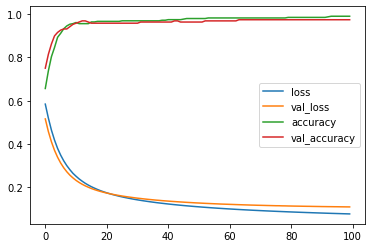

In [62]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();